<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/Project_3_Principle_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimensionality Reduction: Principle component analysis**


Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms high-dimensional data into a lower-dimensional space while preserving as much of the variance (information) as possible. The method achieves this by identifying directions (principal components) in which the data varies the most.



### **Load Data**

In [ ]:
##Load data
expr_matrix = read.delim('https://raw.githubusercontent.com/Omicslogic-git/Project_3_data/refs/heads/main/LIHC_BRCA(NT_TP).txt', header = TRUE, row.names = 1, sep='\t')
# Check the structure of the data
dim(expr_matrix)  # Dimensions of the dataset
head(expr_matrix)  # Preview the first few rows and columns

[1] 10200    12

,TCGA_BC_A10Q_LIHC_NT,TCGA_BC_A10T_LIHC_NT,TCGA_BC_A10W_LIHC_NT,TCGA_2V_A95S_LIHC_TP,TCGA_2Y_A9GS_LIHC_TP,TCGA_2Y_A9GU_LIHC_TP,TCGA_A7_A0CE_BRCA_NT,TCGA_A7_A0CH_BRCA_NT,TCGA_A7_A0D9_BRCA_NT,TCGA_3C_AAAU_BRCA_TP,TCGA_3C_AALJ_BRCA_TP,TCGA_3C_AALK_BRCA_TP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000121410,124518.23,68949.58,100619.73,34197.7,45940.47,11176.18,154.4730,109.3484,15.7841,197.0897,423.2366,191.0178
ENSG00000148584,2969.00,1964.00,2824.00,895.0,3191.00,1501.00,0.6349,0.0000,0.0000,0.0000,0.9066,0.0000
ENSG00000078328,0.00,0.00,0.00,0.0,5.00,0.00,0.6349,3.7612,0.5092,0.0000,0.0000,0.0000
ENSG00000134864,427.02,228.29,320.22,575.3,200.11,3492.56,119.5810,111.9699,105.5041,102.9634,161.2602,62.5072
ENSG00000166535,3.00,0.00,1.00,0.0,0.00,2.00,16.8254,19.5581,22.9124,1.3786,0.0000,1.6549
ENSG00000175899,118972.53,211710.65,134129.62,439428.4,63240.79,292445.68,40198.2063,32634.9299,44700.9521,5798.3746,8840.3989,10960.2193


# **Removal of low expression genes**
To reduce noise and improve computational efficiency

In [ ]:
expr_matrix <- expr_matrix[rowSums(expr_matrix > 1) >= 3, ]
dim(expr_matrix)  # Check the new dimensions

[1] 9710   12

# **log transformation**
The purpose of applying a log transformation to the expression matrix is to reduce the range of values and make the data more suitable for downstream analyses, such as dimensionality reduction (PCA).

In [ ]:
# Log2 transform
expr_matrix_log <- log2(expr_matrix + 1)

# Remove genes with zero variance
expr_matrix_log <- expr_matrix_log[apply(expr_matrix_log, 1, var, na.rm = TRUE) != 0, ]

# Remove rows with NA or Inf
expr_matrix_log <- expr_matrix_log[complete.cases(expr_matrix_log), ]
expr_matrix_log <- expr_matrix_log[!apply(expr_matrix_log, 1, function(x) any(is.infinite(x))), ]

# **Perform Dimensionality Reduction Using PCA**

In [ ]:
# Run PCA
pca_result <- prcomp(t(expr_matrix_log), scale. = TRUE)

In [ ]:
summary(pca_result)

Importance of components:
                           PC1     PC2     PC3      PC4      PC5      PC6
Standard deviation     75.0670 34.5376 31.7796 22.72412 19.22206 16.87876
Proportion of Variance  0.5804  0.1229  0.1040  0.05319  0.03806  0.02934
Cumulative Proportion   0.5804  0.7033  0.8073  0.86046  0.89852  0.92786
                            PC7      PC8      PC9    PC10    PC11      PC12
Standard deviation     15.44959 13.52015 10.90009 9.56546 8.28215 4.152e-14
Proportion of Variance  0.02458  0.01883  0.01224 0.00942 0.00706 0.000e+00
Cumulative Proportion   0.95245  0.97127  0.98351 0.99294 1.00000 1.000e+00

# **Assigning Lables**

In [ ]:
# Get PCA results (first two principal components)
pca_df <- as.data.frame(pca_result$x)
# Assign Tumor and Normal labels
sample_labels <- c(rep("LIHC_NT", 3),
                   rep("LIHC_TP", 3),
                   rep("BRCA_NT", 3),
                   rep("BRCA_TP", 3))

# Add this to your PCA data frame
pca_df$Condition <- sample_labels
head(pca_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Condition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
TCGA_BC_A10Q_LIHC_NT,-77.81722,-46.310038,1.783082,3.864350,0.1295335,2.088428,-0.44532498,-1.21680941,3.5735038,-25.2247838,2.5236061,-1.693992e-13,LIHC_NT
TCGA_BC_A10T_LIHC_NT,-78.08289,-46.650231,-1.453455,-5.399358,-6.7737235,4.588577,0.31995386,0.82307730,21.7255325,16.3157062,1.5306707,-1.443637e-13,LIHC_NT
TCGA_BC_A10W_LIHC_NT,-76.45292,-39.478919,7.121085,15.614213,9.0086382,-5.971211,0.01909359,0.06167338,-25.7947044,9.6670729,-4.1474563,-4.812817e-14,LIHC_NT
TCGA_2V_A95S_LIHC_TP,75.49822,3.233355,37.344202,26.138347,-40.5860495,-2.827189,20.35072719,-4.97032939,-0.4556567,-0.1836963,-0.1953046,4.336809e-15,LIHC_TP
TCGA_2Y_A9GS_LIHC_TP,78.02211,8.092792,47.667901,28.536865,34.8008239,14.514660,-12.95500423,3.41980937,6.2454464,0.5536779,0.5991723,-4.415912e-14,LIHC_TP
TCGA_2Y_A9GU_LIHC_TP,74.78781,-14.953179,39.292168,-59.119292,1.3640585,-10.755750,-3.35526773,0.98047226,-4.0709515,-0.4357840,-0.2835674,-6.661338e-15,LIHC_TP


In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("ggplot2")
BiocManager::install("plotly")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'ggplot2'”
Installing package(s) 'BiocVersion'

Old packages: 'gargle', 'googlesheets4', 'ragg', 'roxygen2', 'textshaping'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'plotly'

also installing the dependencies ‘lazyeval’, ‘crosstalk’


Old packages: 'gargle', 'googlesheets4', 'ragg', 'roxygen2', 'textshaping'



#**Scree data**

In [ ]:
library(ggplot2)

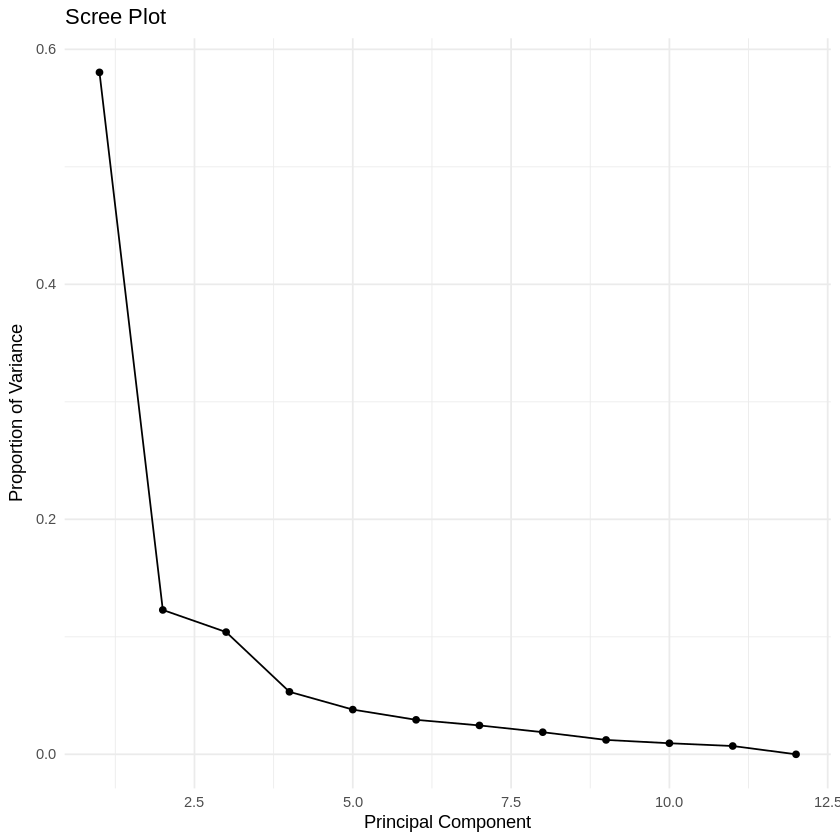

In [ ]:
scree_data <- data.frame(
  PC = 1:length(pca_result$sdev),
  Variance = (pca_result$sdev^2) / sum(pca_result$sdev^2)
)
ggplot(scree_data, aes(x = PC, y = Variance)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  labs(title = "Scree Plot", x = "Principal Component", y = "Proportion of Variance")


##**Plot without Labels**

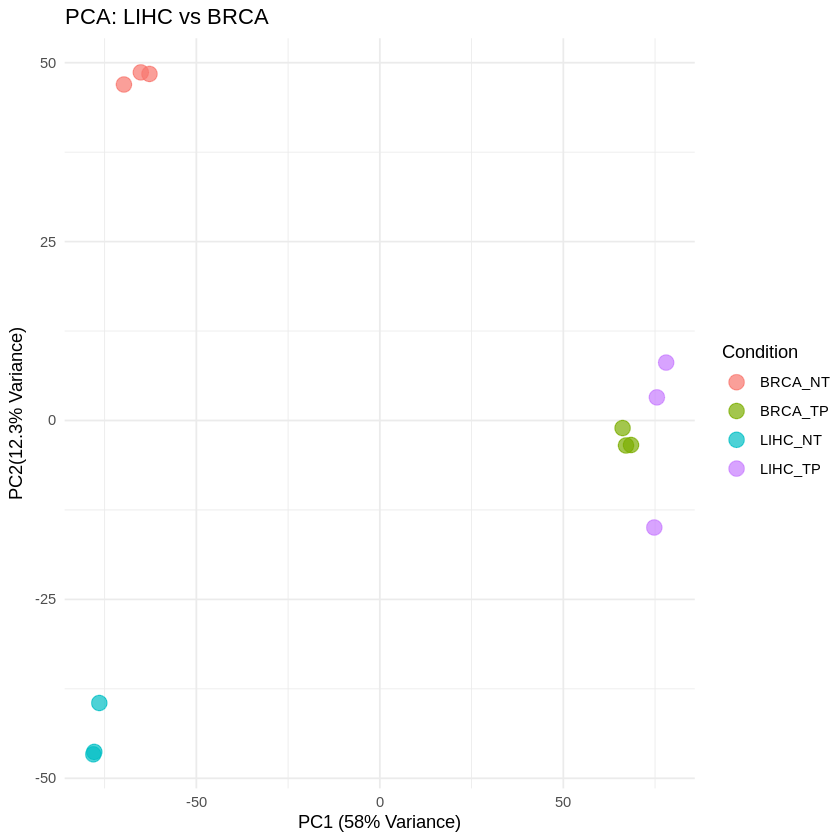

In [ ]:
ggplot(pca_df, aes(x = PC1, y = PC2, color = Condition)) +
  geom_point(size = 4, alpha = 0.7) +
  theme_minimal() +
   labs(title = "PCA: LIHC vs BRCA",
       x = paste0("PC1 (", round(summary(pca_result)$importance[2, 1] * 100, 1), "% Variance)"),
       y = paste0("PC2(", round(summary(pca_result)$importance[2, 2] * 100, 1), "% Variance)"))

## **Plot with label information**

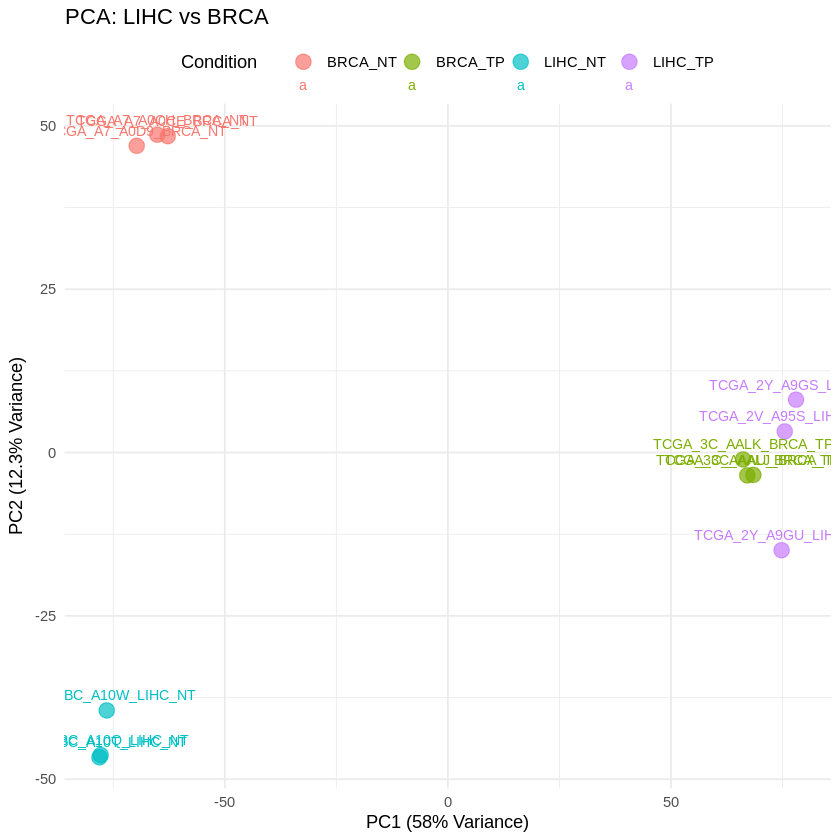

In [ ]:
library(ggplot2)

# Create PCA data frame
pca_df <- data.frame(PC1 = pca_result$x[,1],
                     PC2 = pca_result$x[,2],
                     Sample = colnames(expr_matrix),
                     Condition = factor(sample_labels))  # Replace 'sample_conditions' with your actual condition vector

# PCA plot with sample labels
ggplot(pca_df, aes(x = PC1, y = PC2, color = Condition)) +
  geom_point(size = 4, alpha = 0.7) +  # Scatter plot
  geom_text(aes(label = Sample), vjust = -1, size = 3) +  # Sample labels
  theme_minimal() +
  labs(title = "PCA: LIHC vs BRCA",
       x = paste0("PC1 (", round(summary(pca_result)$importance[2, 1] * 100, 1), "% Variance)"),
       y = paste0("PC2 (", round(summary(pca_result)$importance[2, 2] * 100, 1), "% Variance)")) +
  theme(legend.position = "top")  # Move legend to top


# **Factor Regression Analysis**

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("emmeans")
BiocManager::install("broom")
BiocManager::install("patchwork")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'emmeans'”
Old packages: 'gargle', 'googlesheets4', 'ragg', 'roxygen2', 'textshaping'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'broom'”
Old packages: 'gargle', 'googlesheets4', 'ragg', 'roxygen2', 'textshaping'

'getOption("repos")' replaces Bioconductor s

In [ ]:
# ---------------------------
# 0) Packages
# ---------------------------
library(tidyverse)
library(broom)
library(emmeans)   # for factor-level contrasts

# ---------------------------
# 1) Load and tidy
# ---------------------------
path <- "https://raw.githubusercontent.com/Omicslogic-git/Project_3_data/refs/heads/main/LIHC-BRCA_QN5_data_Pipeline_LIHC_BRCA_20531_genes_FPKM_values_data_Threshold_5_normalized.txt"
dat  <- read.delim(path, check.names = FALSE)   # keep exact column names

# make long format and parse metadata (Tissue, Condition) from column names
long <- dat |>
  pivot_longer(-id, names_to = "Sample", values_to = "Expr") |>
  mutate(
    Tissue    = ifelse(str_detect(Sample, "_LIHC_"), "LIHC",
                ifelse(str_detect(Sample, "_BRCA_"), "BRCA", NA_character_)),
    Condition = ifelse(str_detect(Sample, "_TP\\b"), "TP",
                ifelse(str_detect(Sample, "_NT\\b"), "NT", NA_character_))
  ) |>
  filter(!is.na(Tissue), !is.na(Condition)) |>
  mutate(
    Tissue    = factor(Tissue, levels = c("LIHC", "BRCA")),
    Condition = factor(Condition, levels = c("TP", "NT"))
  )

# quick sanity check (counts per group)
count(long, Tissue, Condition)

# ---------------------------
# 2) Gene-wise factor regression: Expr ~ Tissue * Condition
#    and simple-effect contrasts to match the figure:
#    a) Liver (TP vs NT)
#    b) Breast (TP vs NT)
#    c) LIHC vs BRCA (within TP)
# ---------------------------
fit_by_gene <- function(df_gene) {
  m <- lm(Expr ~ Tissue * Condition, data = df_gene)

  # emmeans grid
  em <- emmeans(m, ~ Tissue * Condition)

  # contrasts matching the figure
  c_liver   <- contrast(em, method = list("LIHC: TP vs NT"      = c( 1,-1, 0, 0)),
                        by = NULL)   # (LIHC,TP) - (LIHC,NT)
  c_breast  <- contrast(em, method = list("BRCA: TP vs NT"      = c( 0, 0, 1,-1)))
  c_tissue  <- contrast(em, method = list("TP: LIHC vs BRCA"    = c( 1, 0,-1, 0)))  # among TP

  tibble(
    term  = c("Pval_Liver_TP_vs_NT", "Pval_Breast_TP_vs_NT", "Pval_Tissue_LIHC_vs_BRCA_in_TP"),
    pval  = c(summary(c_liver)$p.value[1],
              summary(c_breast)$p.value[1],
              summary(c_tissue)$p.value[1])
  )
}

results <- long |>
  group_by(id) |>
  group_modify(~ fit_by_gene(.x)) |>
  ungroup() |>
  pivot_wider(names_from = term, values_from = pval)

# multiple-testing correction (optional but recommended)
results <- results |>
  mutate(
    FDR_Liver   = p.adjust(Pval_Liver_TP_vs_NT, method = "BH"),
    FDR_Breast  = p.adjust(Pval_Breast_TP_vs_NT, method = "BH"),
    FDR_Tissue  = p.adjust(Pval_Tissue_LIHC_vs_BRCA_in_TP, method = "BH")
  )

# write table like in the image
write.csv(results, "factor_regression_pvalues.csv", row.names = FALSE)

# ---------------------------
# 3) Plot recipes (replicate your figure styles)
#    • Bar-by-sample + TP/NT boxplots for a single gene (e.g., MMP11)
#    • 4-group boxplots for several genes (e.g., VWF, CNDP1, AKR1C3)
# ---------------------------

# Helper: bar plot by sample (grouped by Tissue colors and faceting by Tissue)
plot_gene_bars <- function(gene_symbol) {
  gdat <- filter(long, id == gene_symbol)

  # order samples by Tissue then Sample name, to mimic grouped bars
  gdat <- gdat |>
    arrange(Tissue, Sample) |>
    mutate(Sample = factor(Sample, levels = unique(Sample)))

  p1 <- ggplot(gdat, aes(Sample, Expr, fill = Tissue)) +
    geom_col() +
    labs(title = gene_symbol, x = NULL, y = NULL) +
    theme_bw(base_size = 12) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1),
          legend.position = "none")
  p1
}

# Helper: TP vs NT boxplot for a given gene (all tissues combined, facets by Condition label like your right panel)
plot_gene_tpnt_boxes <- function(gene_symbol) {
  gdat <- filter(long, id == gene_symbol)

  p2 <- ggplot(gdat, aes(Condition, Expr)) +
    geom_boxplot(width = 0.5, outlier.shape = NA) +
    geom_point(position = position_jitter(width = 0.08, height = 0), alpha = 0.6) +
    labs(title = gene_symbol, x = NULL, y = NULL) +
    theme_bw(base_size = 12)
  p2
}

# Example: MMP11 (replace with the exact ID string in your file if needed)
p_bar_MMP11 <- plot_gene_bars("MMP11")
p_box_MMP11 <- plot_gene_tpnt_boxes("MMP11")

ggsave("MMP11_by_sample_bars.png", p_bar_MMP11, width = 12, height = 5, dpi = 300)
ggsave("MMP11_TP_vs_NT_box.png",  p_box_MMP11, width = 6,  height = 5, dpi = 300)

# ---- 4-group boxplots for multiple genes ----
genes4 <- c("VWF", "CNDP1", "AKR1C3")  # edit to your targets

plot_4group_box <- function(gene_symbol) {
  gdat <- filter(long, id == gene_symbol) |>
    mutate(Group = paste(Tissue, Condition, sep = "_"))

  p <- ggplot(gdat, aes(Group, Expr)) +
    geom_boxplot(width = 0.5, outlier.shape = NA) +
    geom_point(position = position_jitter(width = 0.08, height = 0), alpha = 0.6) +
    labs(title = gene_symbol, x = NULL, y = NULL) +
    theme_bw(base_size = 12)
  p
}

walk(genes4, ~ ggsave(paste0(.x, "_4group_box.png"),
                      plot_4group_box(.x), width = 6, height = 5, dpi = 300))

# ---------------------------
# 4) (Optional) Save a combined figure for a report
# ---------------------------
# If you want a single multi-panel image like your example:
library(patchwork)
combo <- p_bar_MMP11 / p_box_MMP11
ggsave("MMP11_combo.png", combo, width = 12, height = 9, dpi = 300)

Tissue,Condition,n
<fct>,<fct>,<int>
LIHC,TP,61590
LIHC,NT,61590
BRCA,TP,61590
BRCA,NT,61590
